# Introduction:

The data provided comes from images of handwritten digits, these handwritten digits have then been downloaded and converted into a 28 by 28 pixel grid with higher numbers representing the darkness of the pen. 

## Plan:

- 1). EDA: Check if the classes are balanced, Check to see if all columns are useful, Check for NaN or Null values, Plot a few random digits.
- 2). ML: Try a few models (svm, logistic regression, random forest), see if PCA or another type of feature selection method is useful.
- 3). Optimise selected algorithm. 

**Import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import time
import math
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

## 1). EDA

**Importing the data and converting it into a DF**

In [2]:
df = pd.read_csv("C:/Users/UKGC/Python/Data/Supervised Learning Projects/Digit Classification/train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


**No missing data. The df will be split now into train and test to avoid finding correlations in the test data to better simulate a deployed model**

In [4]:
X = df.drop(labels="label", axis = 1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [5]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
40591,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Very sparse matrix**

In [6]:
X_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,29400.0,29400.0,29400.0,29400.0,29400.0,29400.0,29400.0,29400.0,29400.0,29400.0,...,29400.000000,29400.000000,29400.000000,29400.000000,29400.000000,29400.000000,29400.0,29400.0,29400.0,29400.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.230884,0.136224,0.068231,0.024490,0.024626,0.004082,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.490728,5.155659,3.557983,1.966525,2.264329,0.495138,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


**Find the column with the highest mean value. This will show which pixels have the most data and are therefore most important.**

In [7]:
pixel_importance = X_train.describe().loc["mean"].sort_values(ascending=False)

**The below plot shows the mean value of the digits in a particular pixel. It can be seen that there are many pixels that dont have much information, these could be removed to improve model speed**

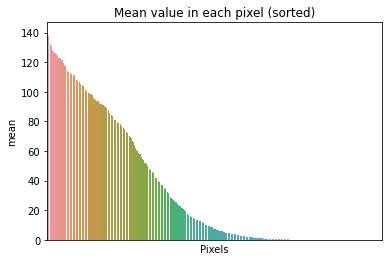

In [8]:
sns.barplot(x=pixel_importance.index, y=pixel_importance)
_=plt.title("Mean value in each pixel (sorted)")
_=plt.xticks([])
_=plt.xlabel("Pixels")

**The useful pixels seem to cluster together, as shown in the plot below**

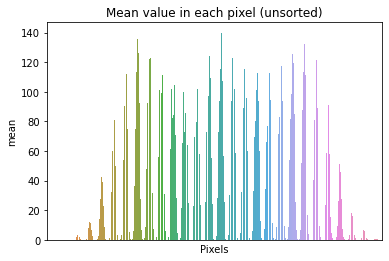

In [9]:
pixel_importance = X_train.describe().loc["mean"]
sns.barplot(x=pixel_importance.index, y=pixel_importance)
_=plt.title("Mean value in each pixel (unsorted)")
_=plt.xticks([])
_=plt.xlabel("Pixels")

**Create a function that removes all the pixels with mean values less than a specified threshold value. This is done on both training and test data.**

In [10]:
def remove_pixels(X_train, X_test, cutoff):
    # Create copies of the data:
    X_train_ = X_train.copy()
    X_test_ = X_test.copy()
    
    # Loop through the columns and drop any that have mean values < cutoff:
    for column in X_train_:
        if X_train_[column].mean() < cutoff:
            X_train_.drop(labels=column, axis=1, inplace=True)
            X_test_.drop(labels=column, axis=1, inplace=True)
            
    # Return a tuple of the train and test data
    return X_train_, X_test_

**Test with treshold = 30 (probably way too high)**

In [11]:
pixels_useful = remove_pixels(X_train, X_test, 30)[0].describe().loc["mean"].sort_values(ascending=False)

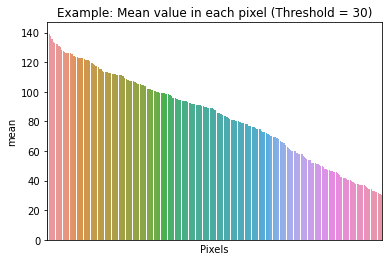

In [12]:
sns.barplot(x=pixels_useful.index, y=pixels_useful)
_=plt.title("Example: Mean value in each pixel (Threshold = 30)")
_=plt.xticks([])
_=plt.xlabel("Pixels")

**Check the class distribution for imbalance**

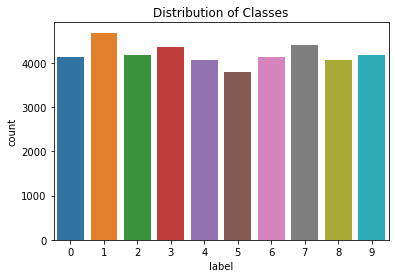

In [13]:
sns.countplot(df["label"])
_=plt.title("Distribution of Classes")

**Class distribution seems to be relatively uniform, no further action needed**

**Examine Random digit images. Below is the code to plot 9 random digits from the data, this helps to better understand the features**

In [14]:
# Only works with squared numbers...

def plot_random_digits(size):
    
    # Selects n-size random rows from the data (9 random digits to examine).
    random_row = np.random.randint(0,len(X),size)
    digit_plots = X.iloc[random_row]
    
    # Create list of 28 by 28 arrays, and match them with the labels.
    digit_matrix = []
    digit_labels = []
    for row in digit_plots.index:
        digit_matrix.append(np.array(digit_plots.loc[row]).reshape(28,28))
        digit_labels.append(y.loc[row])
    
    rows, columns = int(math.sqrt(size)), int(math.sqrt(size))
    count = 0
    fig, axs = plt.subplots(rows, columns, sharex=True, sharey=True, figsize=(10,10))
    
    # Removes the x-yticks from plots
    plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
    
    # Plot the digits with their labels in a subplot.
    for row in range(0,rows):
        for column in range(0,columns):
            fig.tight_layout()
            axs[row,column].imshow(digit_matrix[count], cmap=plt.cm.gray_r, interpolation='nearest')
            axs[row,column].set_title("Label: " + str(digit_labels[count]))
            count += 1

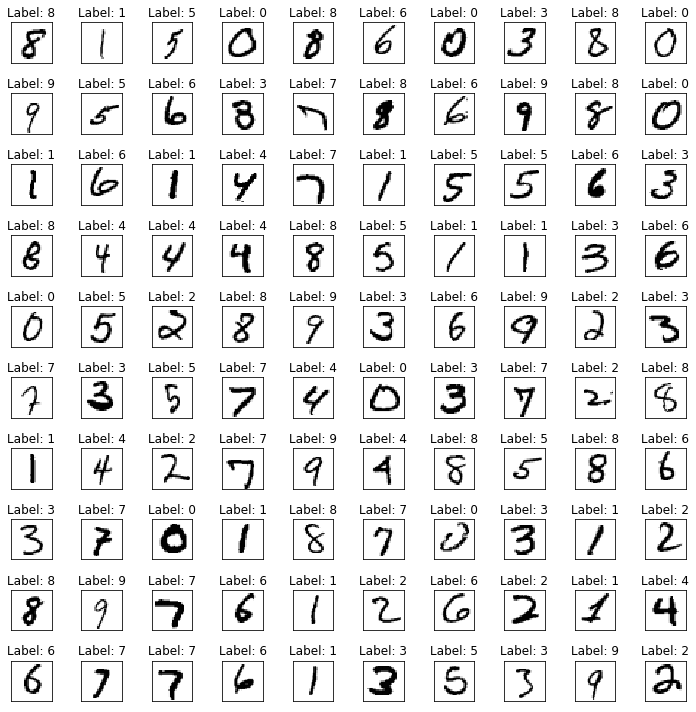

In [15]:
plot_random_digits(100)

**Using a Decision Tree to determine important feature. Note that this only looks at the features without any connection between other features**

In [16]:
dt_model = DecisionTreeClassifier().fit(X_train, y_train)
importances = dt_model.feature_importances_

In [17]:
# Come back and figure better way to plot this, as barplot color is linked
# with hue so its not simple to the bar colours. (same for above plots)

In [18]:
# Should compare this with the pixel importance above

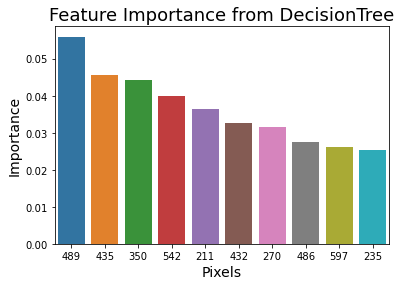

In [19]:
important_features = pd.Series(data=importances).sort_values(ascending=False)
bar_order = important_features[0:10].index
sns.barplot(x = important_features[0:10].index, y = important_features[0:10],
            order=bar_order)
_=plt.title("Feature Importance from DecisionTree", fontsize=18)
_=plt.xlabel("Pixels", fontsize=14)
_=plt.ylabel("Importance", fontsize=14)

**10 most important features/pixels can be seen above**

**Comparing the features found from the decision tree and the highest mean value for each pixel:**

In [20]:
print(pixels_useful.index[0:10])
print(important_features[0:10].index)

Index(['pixel407', 'pixel435', 'pixel408', 'pixel434', 'pixel211', 'pixel210',
       'pixel212', 'pixel602', 'pixel436', 'pixel601'],
      dtype='object')
Int64Index([489, 435, 350, 542, 211, 432, 270, 486, 597, 235], dtype='int64')


**Very interesting that both 435 and 211 are in both lists**

## 2). Machine Learning Section

**The model will be evaluated based on its accuracy, this is because I want to correctly classify as many many entries as possible and there is equal importance on FN and FP.**

**Create a Dummy Classifier to have as a benchmark.**

Dummy Model Accuracy: 0.10142857142857142


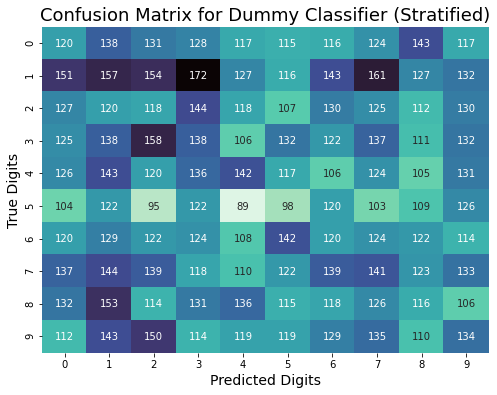

In [21]:
dummy_random = DummyClassifier(strategy = "stratified").fit(X_train, y_train)
y_dummy_predictions = dummy_random.predict(X_test)

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_dummy_predictions),
            annot=True, fmt='g', cmap="mako_r", cbar=False)

_=plt.xlabel("Predicted Digits", fontsize=14)
_=plt.ylabel("True Digits", fontsize=14)
_=plt.title("Confusion Matrix for Dummy Classifier (Stratified)", fontsize=18)
print("Dummy Model Accuracy: {}".format(dummy_random.score(X_test,y_test)))

**From the stratified dummy classifier the benchmark <font size="4"> accuracy is 0.10</font>, which makes sense as the model is randomly selecting labels for each new instance so there is a 1/10 change of correctly predicting a digit.**

### SVM

Model runtime: 182.3s
Default SVC Test Accuracy: 0.9734920634920635
Default SVC Train Accuracy: 0.9887414965986394


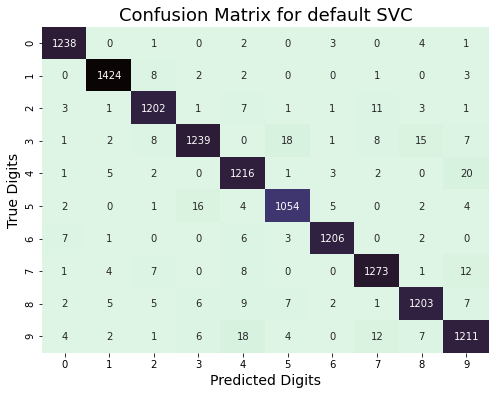

In [68]:
start = time.perf_counter()
svc_model = SVC().fit(X_train, y_train)
svm_predictions = svc_model.predict(X_test)
end = time.perf_counter()

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, svm_predictions),
            annot=True, fmt='g', cmap="mako_r", cbar=False)

_=plt.xlabel("Predicted Digits", fontsize=14)
_=plt.ylabel("True Digits", fontsize=14)
_=plt.title("Confusion Matrix for default SVC", fontsize=18)
print("Model runtime: {:0.1f}s".format(end-start))
print("Default SVC Test Accuracy: {:0.3f}".format(svc_model.score(X_test,y_test)))
print("Default SVC Train Accuracy: {:0.3f}".format(svc_model.score(X_train,y_train)))

### Feature Reduction using Created Function:

Model runtime: 37.9s
Default SVC Test Accuracy: 0.9378571428571428
Default SVC Train Accuracy: 0.9631632653061224


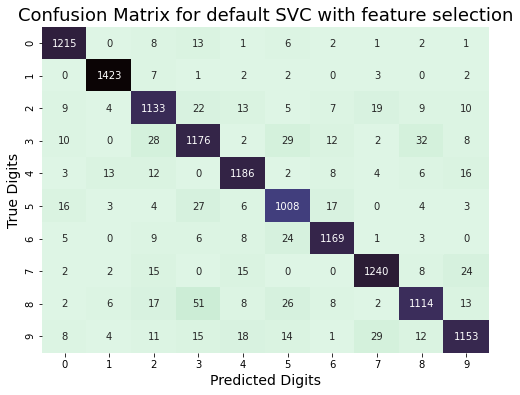

In [70]:
X_train_test = remove_pixels(X_train, X_test, 100)
X_train_thresh = X_train_test[0]
X_test_thresh = X_train_test[1]

start = time.perf_counter()
svc_model = SVC().fit(X_train_thresh, y_train)
svm_predictions = svc_model.predict(X_test_thresh)
end = time.perf_counter()

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, svm_predictions),
            annot=True, fmt='g', cmap="mako_r", cbar=False)

_=plt.xlabel("Predicted Digits", fontsize=14)
_=plt.ylabel("True Digits", fontsize=14)
_=plt.title("Confusion Matrix for default SVC with feature selection", fontsize=18)
print("Model runtime: {:0.1f}s".format(end-start))
print("Default SVC Test Accuracy: {:0.3f}".format(svc_model.score(X_test_thresh,y_test)))
print("Default SVC Train Accuracy: {:0.3f}".format(svc_model.score(X_train_thresh,y_train)))

**Runtime improvement of 4.8 but accuracy drop of 3.5%, this shows that the feature selection function is worth using especially if I run cross validation.**

### Using Dimensionality Reduction in Comparison to my Feature Selection Method:

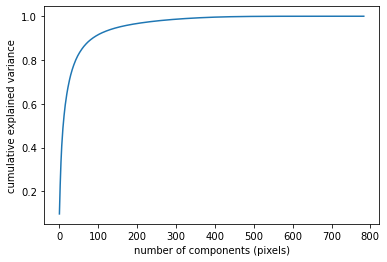

In [93]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components (pixels)')
plt.ylabel('cumulative explained variance');

**From the above plot it look like n_components should be around 100-400**

In [99]:
runtime = []
train_score = []
test_score = []

for i in list(range(100,500,100)):
    pca = PCA(n_components=i).fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    start = time.perf_counter()
    svc_model = SVC().fit(X_train_pca, y_train)
    svm_predictions = svc_model.predict(X_test_pca)
    end = time.perf_counter()
    
    runtime.append(end-start)
    train_score.append(svc_model.score(X_train_pca,y_train))
    test_score.append(svc_model.score(X_test_pca,y_test))

In [128]:
n_components_ = pd.Series(list(range(100,500,100)))
runtime_ = pd.Series(runtime)
train_score_ = pd.Series(train_score)
test_score_ = pd.Series(test_score)

pca_component = pd.concat([n_components_, runtime_, train_score_, test_score_], axis=1)
pca_component.columns = ["n components", "Runtime (s)", "Training Score", "Testing Score"]
pca_component

,n components,Runtime (s),Training Score,Testing Score
0,100,26.847067,0.991939,0.979921
1,200,55.437923,0.992789,0.978492
2,300,81.814381,0.993163,0.977857
3,400,108.455324,0.993367,0.977857


In [5]:
pca = PCA(n_components=100).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

**With n_components > 100 the impact on training and testing scores is minimal, therefore i will use n_components=100**

### Default Models:

**SVM:**

Model runtime: 27.3s
Default SVC Test Accuracy: 0.980
Default SVC Train Accuracy: 0.992


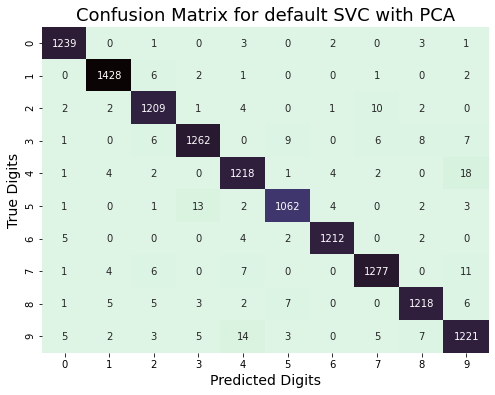

In [10]:
start = time.perf_counter()
svc_model = SVC().fit(X_train_pca, y_train)
svm_predictions = svc_model.predict(X_test_pca)
end = time.perf_counter()

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, svm_predictions),
            annot=True, fmt='g', cmap="mako_r", cbar=False)

_=plt.xlabel("Predicted Digits", fontsize=14)
_=plt.ylabel("True Digits", fontsize=14)
_=plt.title("Confusion Matrix for default SVC with PCA", fontsize=18)
print("Model runtime: {:0.1f}s".format(end-start))
print("Default SVC Test Accuracy: {:0.3f}".format(svc_model.score(X_test_pca,y_test)))
print("Default SVC Train Accuracy: {:0.3f}".format(svc_model.score(X_train_pca,y_train)))

**Default SVM shows good performance with training and test scores close and over 98%**

**Random Forest:**

Model runtime: 5.1s
Default RF Test Accuracy: 0.945
Default RF Train Accuracy: 1.000


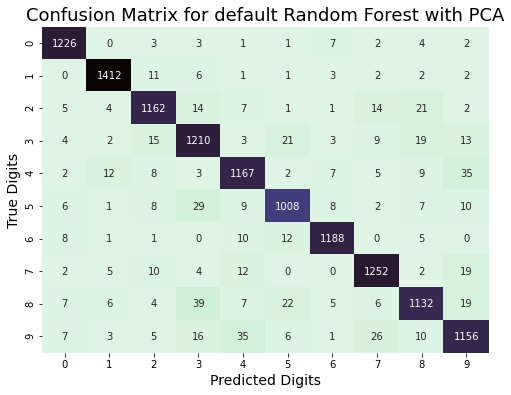

In [28]:
start = time.perf_counter()
RF_model = RandomForestClassifier(n_jobs=8).fit(X_train_pca, y_train)
RF_predictions = RF_model.predict(X_test_pca)
end = time.perf_counter()

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, RF_predictions),
            annot=True, fmt='g', cmap="mako_r", cbar=False)

_=plt.xlabel("Predicted Digits", fontsize=14)
_=plt.ylabel("True Digits", fontsize=14)
_=plt.title("Confusion Matrix for default Random Forest with PCA", fontsize=18)
print("Model runtime: {:0.1f}s".format(end-start))
print("Default RF Test Accuracy: {:0.3f}".format(RF_model.score(X_test_pca,y_test)))
print("Default RF Train Accuracy: {:0.3f}".format(RF_model.score(X_train_pca,y_train)))

**Default RF shows overtraining as training is 100%, and test score is only 94%, however by using n_jobs the runtime is only 5.1s!**

**Logistic Regression:**

Model runtime: 1.6s
Default LR Test Accuracy: 0.912
Default LR Train Accuracy: 0.919


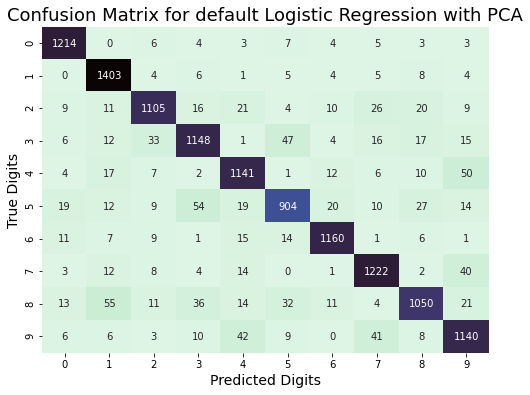

In [29]:
start = time.perf_counter()
Log_model = LogisticRegression().fit(X_train_pca, y_train)
Log_predictions = Log_model.predict(X_test_pca)
end = time.perf_counter()

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, Log_predictions),
            annot=True, fmt='g', cmap="mako_r", cbar=False)

_=plt.xlabel("Predicted Digits", fontsize=14)
_=plt.ylabel("True Digits", fontsize=14)
_=plt.title("Confusion Matrix for default Logistic Regression with PCA", fontsize=18)
print("Model runtime: {:0.1f}s".format(end-start))
print("Default LR Test Accuracy: {:0.3f}".format(Log_model.score(X_test_pca,y_test)))
print("Default LR Train Accuracy: {:0.3f}".format(Log_model.score(X_train_pca,y_train)))

**Very fast model but with much lower performance**

**Multi-Layer Perceptron:**

Model runtime: 12.0s
Default MLP Test Accuracy: 0.962
Default MLP Train Accuracy: 0.997


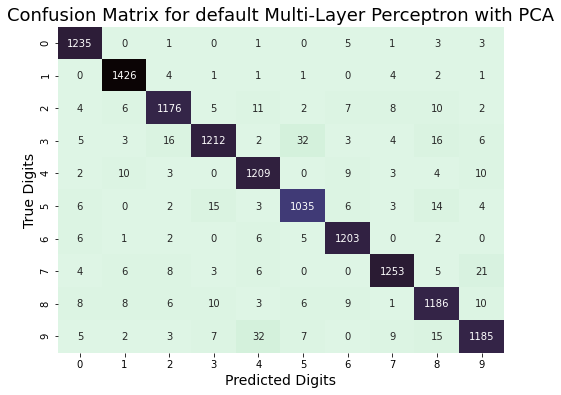

In [31]:
start = time.perf_counter()
MLP_model = MLPClassifier().fit(X_train_pca, y_train)
MLP_predictions = MLP_model.predict(X_test_pca)
end = time.perf_counter()

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, MLP_predictions),
            annot=True, fmt='g', cmap="mako_r", cbar=False)

_=plt.xlabel("Predicted Digits", fontsize=14)
_=plt.ylabel("True Digits", fontsize=14)
_=plt.title("Confusion Matrix for default Multi-Layer Perceptron with PCA", fontsize=18)
print("Model runtime: {:0.1f}s".format(end-start))
print("Default MLP Test Accuracy: {:0.3f}".format(MLP_model.score(X_test_pca,y_test)))
print("Default MLP Train Accuracy: {:0.3f}".format(MLP_model.score(X_train_pca,y_train)))

**MLP shows good scores, perhaps small overtraining, fast runtime**

### Model Tuning:

**Both the MLP and SVC show promissing results so both will be tuned and compared in a final evaluation**

### Finding Grid Parameter Ranges for SVC:

**Finding Suitable C Range**

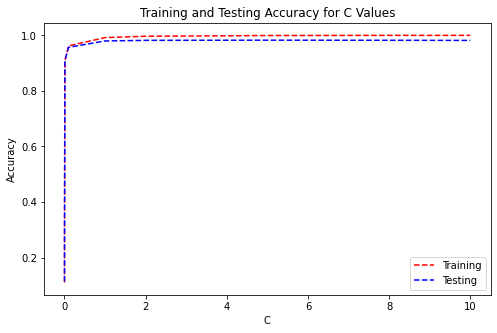

In [175]:
training_c = []
testing_c = []
C = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 8, 10]

for i in C:
    svc_model_c = SVC(C=i).fit(X_train_pca, y_train)
    training_c.append(svc_model_c.score(X_train_pca, y_train))
    testing_c.append(svc_model_c.score(X_test_pca, y_test))
    
plt.figure(figsize=(8,5))
plt.plot(C, training_c, "r--", label="Training")
plt.plot(C, testing_c, "b--", label="Testing")
plt.legend()
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracy for C Values")
plt.show()

In [176]:
svc_model_best_c = SVC(C=5)

cross_val_score_SVC_c = cross_val_score(svc_model_best_c, X, y, cv=5, n_jobs=6)
print("Mean CV Score for Best C Value: {:.3f}".format(cross_val_score_SVC_c.mean()))

Mean CV Score for Best C Value: 0.980


**Finding Suitable Gamma Range**

In [186]:
X.var().mean()

4380.1291400160335

The gamma range was chosen based on the default gamma value which is based on the equation: 
\begin{equation*} 
\frac{1}{(n_features * X.var())}
\end{equation*}

= 1/(28x28x4380) = 2.9e-7

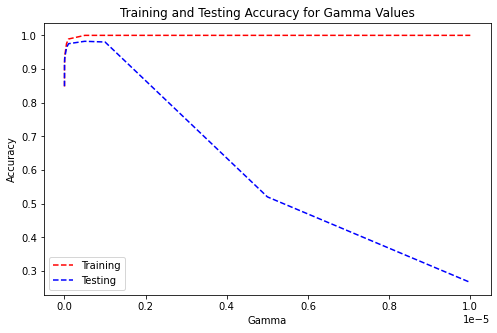

In [177]:
training_gam = []
testing_gam = []
gamma = [1e-10, 1e-9, 5e-9, 1e-8, 5e-8, 1e-7, 5e-7, 1e-6, 5e-6, 1e-5]

for j in gamma:
    svc_model_gamma = SVC(C=5, gamma=j).fit(X_train_pca, y_train)
    training_gam.append(svc_model_gamma.score(X_train_pca, y_train))
    testing_gam.append(svc_model_gamma.score(X_test_pca, y_test))
    
plt.figure(figsize=(8,5))
plt.plot(gamma, training_gam, "r--", label="Training")
plt.plot(gamma, testing_gam, "b--", label="Testing")
plt.legend()
plt.xlabel("Gamma")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracy for Gamma Values")
plt.show()

In [187]:
svc_model_best_gamma = SVC(C=2, gamma=5e-7)

cross_val_score_SVC_gamma = cross_val_score(svc_model, X, y, cv=5, n_jobs=8)
print("Mean CV Score for Best Gamma Value: {:.3f}".format(cross_val_score_SVC_gamma.mean()))

Mean CV Score for Best Gamma Value: 0.980


**Best model from simple parameter investigation**

Tuned SCV Test Accuracy: 0.982
Tuned SCV Train Accuracy: 0.999


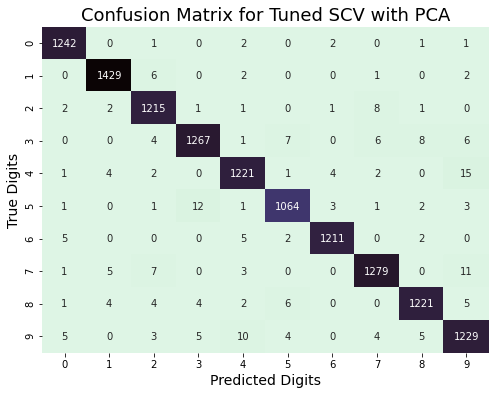

In [198]:
svc_model_final = SVC(C=2, gamma=5e-7).fit(X_train_pca, y_train)
svc_final_predictions = svc_model_final.predict(X_test_pca)

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, svc_final_predictions),
            annot=True, fmt='g', cmap="mako_r", cbar=False)

_=plt.xlabel("Predicted Digits", fontsize=14)
_=plt.ylabel("True Digits", fontsize=14)
_=plt.title("Confusion Matrix for Tuned SCV with PCA", fontsize=18)
print("Tuned SCV Test Accuracy: {:0.3f}".format(svc_model_final.score(X_test_pca,y_test)))
print("Tuned SCV Train Accuracy: {:0.3f}".format(svc_model_final.score(X_train_pca,y_train)))

#### SVC:

In [189]:
svc_model = SVC()

cross_val_score_SVC = cross_val_score(svc_model, X, y, cv=5, n_jobs=8)

In [190]:
grid = {"kernel": ["rbf","poly"],
       "C":[0.1,1,2,5],
       "gamma":[5e-9, 1e-8, 5e-8, 1e-7, 5e-7]}

grid_svc_model = GridSearchCV(SVC(), param_grid = grid, n_jobs=6)
grid_svc_model.fit(X_train_pca, y_train)

params_svc = grid_svc_model.best_params_

svc_best_model = SVC(kernel=params_svc["kernel"],
                     C=params_svc["C"],
                     gamma=params_svc["gamma"])

cross_val_score_SVC_best = cross_val_score(svc_best_model, X, y, cv=5, n_jobs=8)

In [191]:
print("Default SVC Cross Validation Mean Score: {:.3f}".format(cross_val_score_SVC.mean()))
print("Hypertuned SVC Cross Validation Mean Score: {:.3f}".format(cross_val_score_SVC_best.mean()))

Default SVC Cross Validation Mean Score: 0.976
Hypertuned SVC Cross Validation Mean Score: 0.982


**Using CV the default SVC produces slightly better results than the hypertuned.**

#### MLP Tuning:

In [192]:
MLP_model = MLPClassifier()

cross_val_score_MLP = cross_val_score(MLP_model, X, y, cv=5, n_jobs=8)

In [193]:
grid = {"hidden_layer_sizes": [(100,100),(500,500)],
       "activation":["tanh","logistic"],
       "alpha":[0.01,0.1,1,5]}

grid_MLP_model = GridSearchCV(MLPClassifier(), param_grid=grid, n_jobs=8)
grid_MLP_model.fit(X_train_pca, y_train)

params_MLP = grid_MLP_model.best_params_

MLP_best_model = MLPClassifier(hidden_layer_sizes=params_MLP["hidden_layer_sizes"],
                               activation=params_MLP["activation"],
                               alpha=params_MLP["alpha"])

cross_val_score_MLP_best = cross_val_score(MLP_best_model, X, y, cv=5, n_jobs=8)

In [194]:
print("Default MLP Cross Validation Mean Score: {:.3f}".format(cross_val_score_MLP.mean()))
print("Hypertuned MLP Cross Validation Mean Score: {:.3f}".format(cross_val_score_MLP_best.mean()))

Default MLP Cross Validation Mean Score: 0.956
Hypertuned MLP Cross Validation Mean Score: 0.959


### The Best Model is the Hypertuned SVC:

Optimal SCV Test Accuracy: 0.982
Optimal SCV Train Accuracy: 0.999


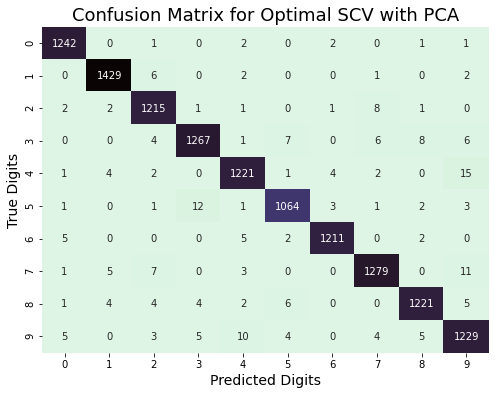

In [197]:
svc_model_best = svc_best_model.fit(X_train_pca, y_train)
svc_final_predictions = svc_model_best.predict(X_test_pca)

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, svc_final_predictions),
            annot=True, fmt='g', cmap="mako_r", cbar=False)

_=plt.xlabel("Predicted Digits", fontsize=14)
_=plt.ylabel("True Digits", fontsize=14)
_=plt.title("Confusion Matrix for Optimal SCV with PCA", fontsize=18)
print("Optimal SCV Test Accuracy: {:0.3f}".format(svc_model_best.score(X_test_pca,y_test)))
print("Optimal SCV Train Accuracy: {:0.3f}".format(svc_model_best.score(X_train_pca,y_train)))

In [ ]:
# analysis the incorrect digits by plotting them and labelling them with the predictions.
# how to process the test data?
# now to pickle the model.